In [13]:

import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

import my_functions_v13 as my
import importlib

from tqdm import tqdm
importlib.reload(my)

<module 'my_functions_v13' from '/Users/lucasumann/PycharmProjects/Masterarbeit/Notebooks/my_functions_v13.py'>

In [14]:
time_windows = [7, 14, 30, 45, 60, 75, 90, 105, 120, 135, 150, 165, 180, 195, 210, 225, 240, 255, 270, 285, 300, 315, 330, 345, 360, 720, "all"]

In [31]:
results = {}

In [16]:
window_size_training = 0.3

In [17]:
number_factors = 3

In [18]:
full_coins_model = my.cond_auto_model(full_input = True, parallel_runs = 2, factor_dim=number_factors, model_name = "322 coins with intercept v13 training window "+str(window_size_training))
full_coins_model.test_percent = 1 - window_size_training
full_coins_model.initialize_X_Y()

In [23]:
for time in tqdm(time_windows):
    full_coins_model.initialize_X_Y()
    full_coins_model.make_future_predictions(factor_averaging_days=time)
    full_coins_model.update_future_Y_predictions(factor_averaging_days=time)
    full_coins_model.reset_X_Y()
    full_coins_model.calculate_predictive_r2()
    results[time] = {"Rsquared predictive" : full_coins_model.Rsquared_predictive_list,
                     "masked Rsquared predictive" : full_coins_model.masked_Rsquared_predictive_list}


  0%|          | 0/27 [00:00<?, ?it/s]

Make predictions of step number 0


  0%|          | 0/27 [01:34<?, ?it/s]


TypeError: weight_decay is not a valid argument, kwargs should be empty  for `optimizer_experimental.Optimizer`.

In [32]:
# Read all results
for time in tqdm(time_windows[:-1]):
    full_coins_model.update_future_Y_predictions(factor_averaging_days=time)
    full_coins_model.reset_X_Y()
    full_coins_model.calculate_predictive_r2()
    relevant_Rsquared_predictive_average = 1 - ((full_coins_model.masked_Y_pred_future_average[-1194:] - full_coins_model.masked_Y_test[-1194:])**2).sum().sum() / (full_coins_model.masked_Y_test[-1194:]**2).sum().sum()
    results[time] = relevant_Rsquared_predictive_average


100%|██████████| 26/26 [00:10<00:00,  2.37it/s]


In [33]:
results_df = pd.DataFrame({"Days" : results.keys(), "Relevant Rsquared predictive": results.values()})

<AxesSubplot:xlabel='Days', ylabel='Relevant Rsquared predictive'>

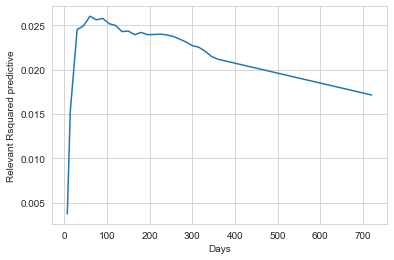

In [34]:
sns.lineplot(data = results_df, x = "Days", y = "Relevant Rsquared predictive")